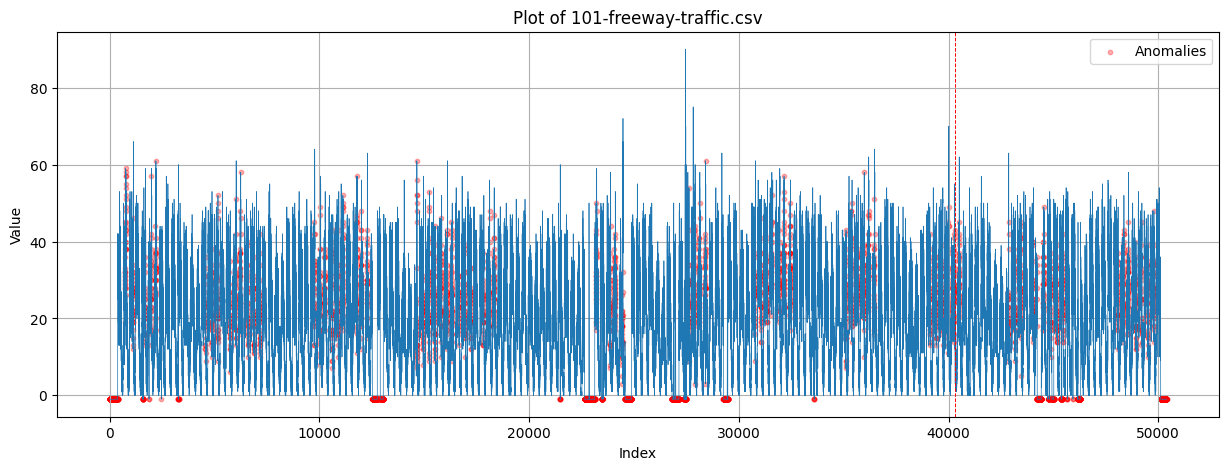

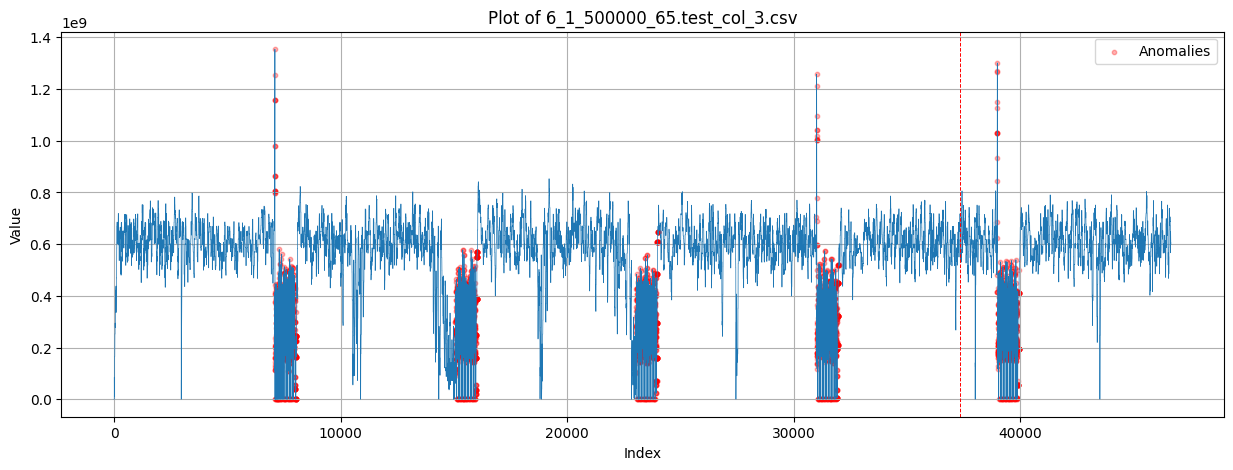

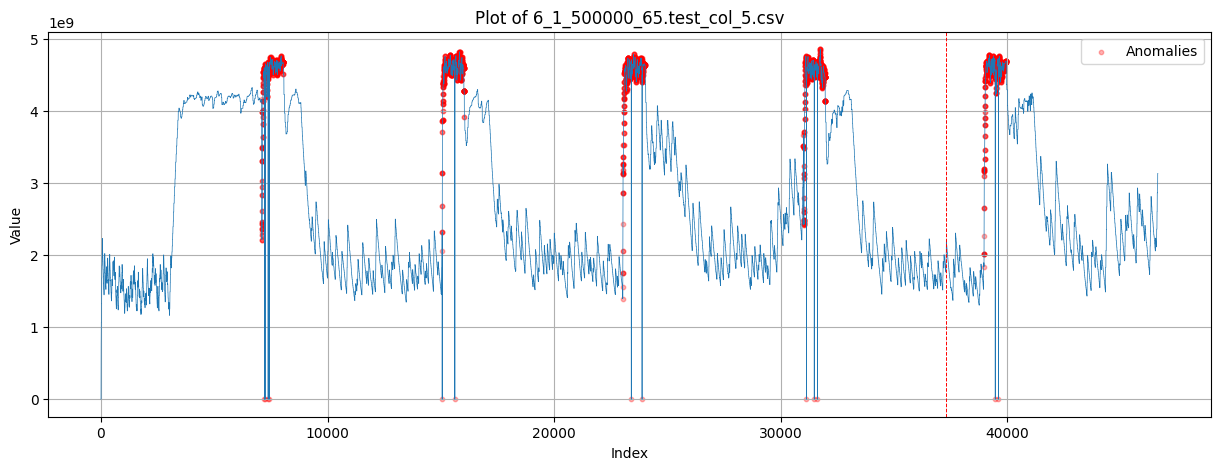

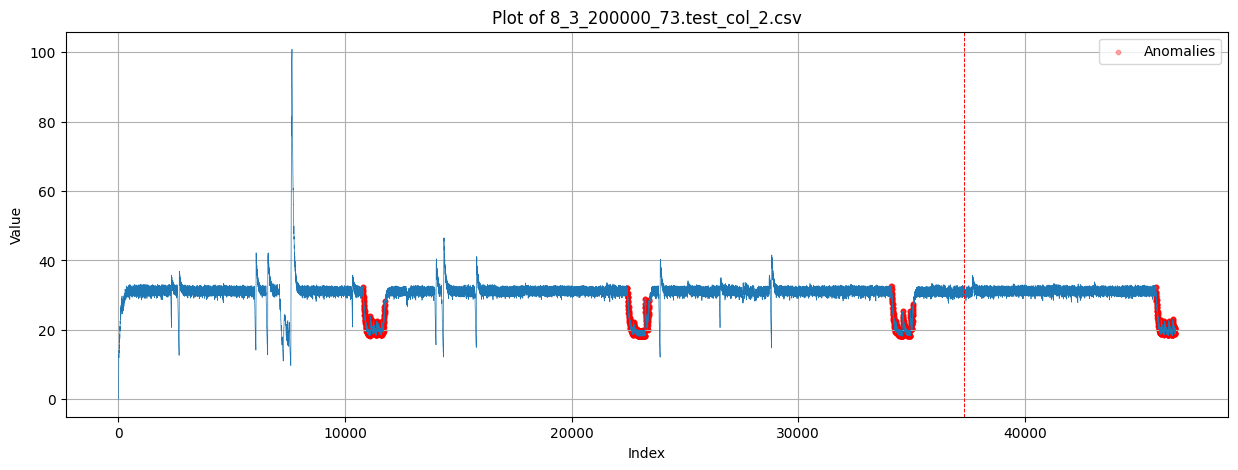

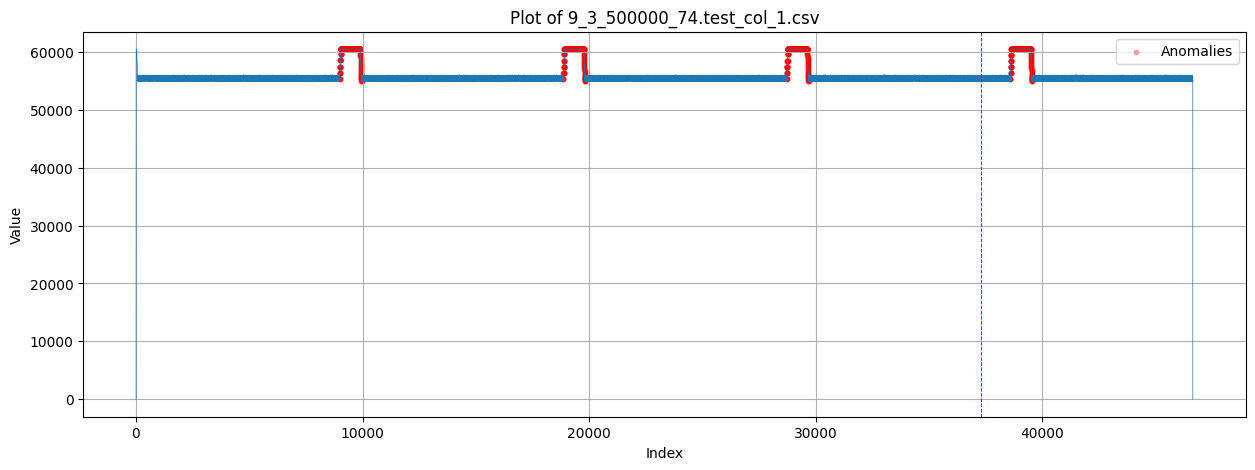

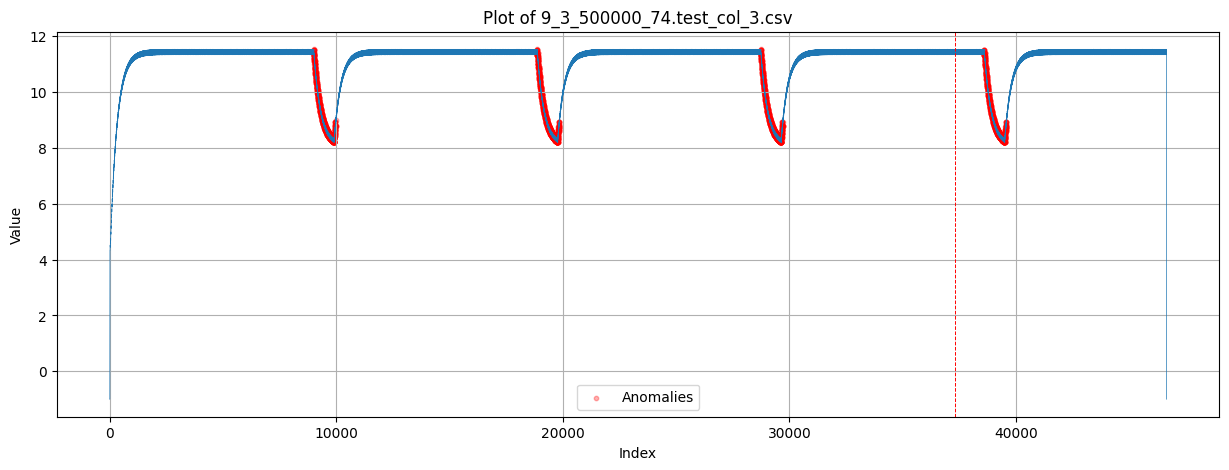

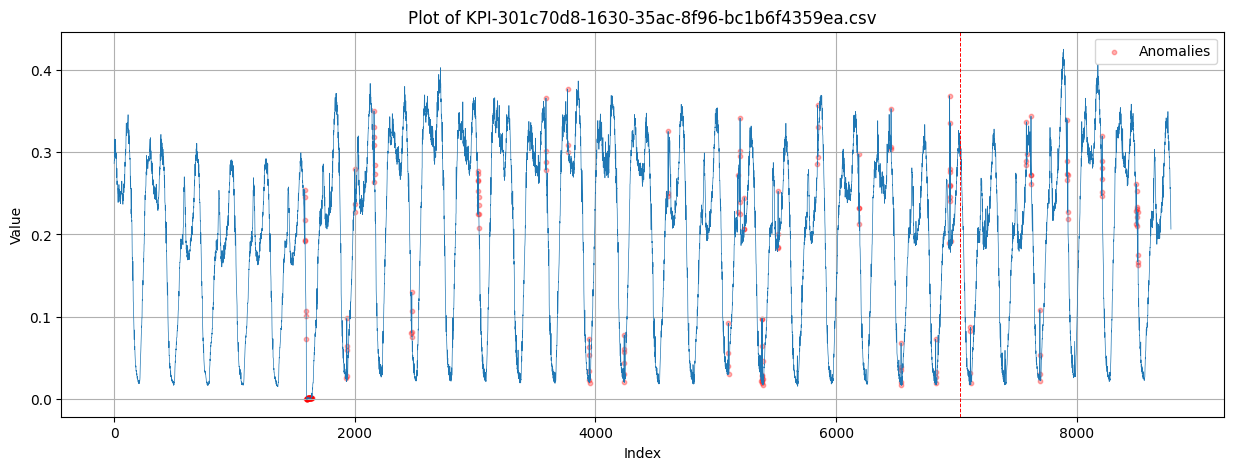

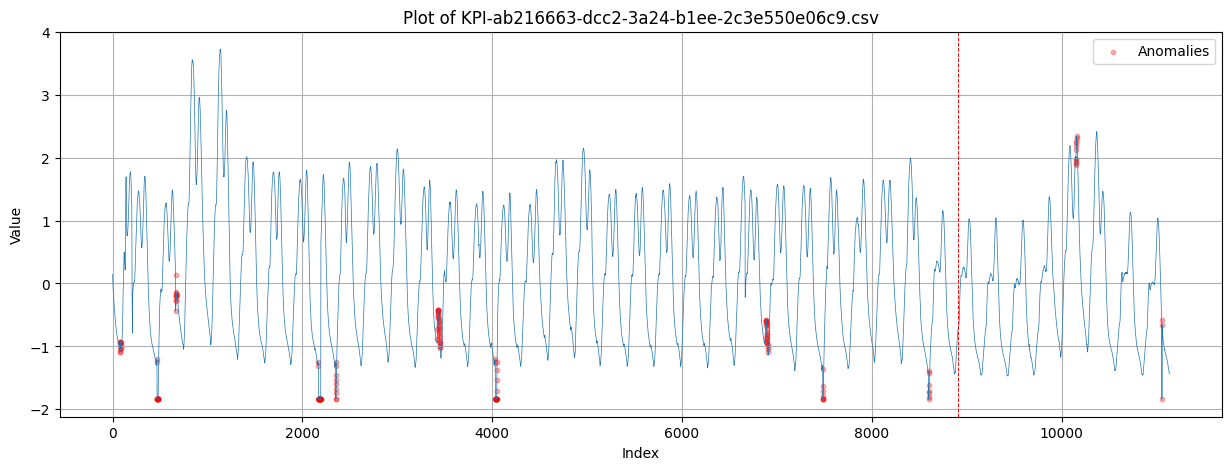

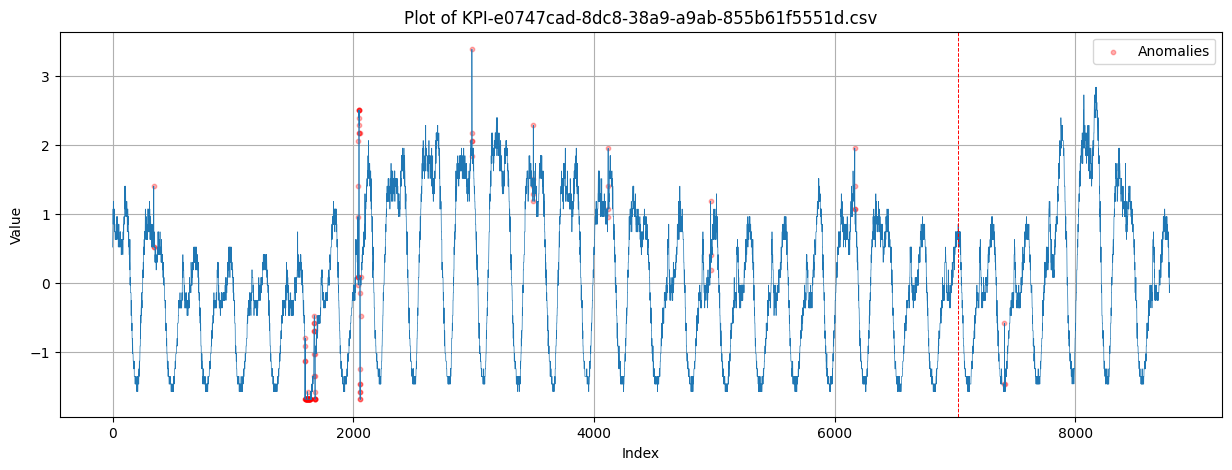

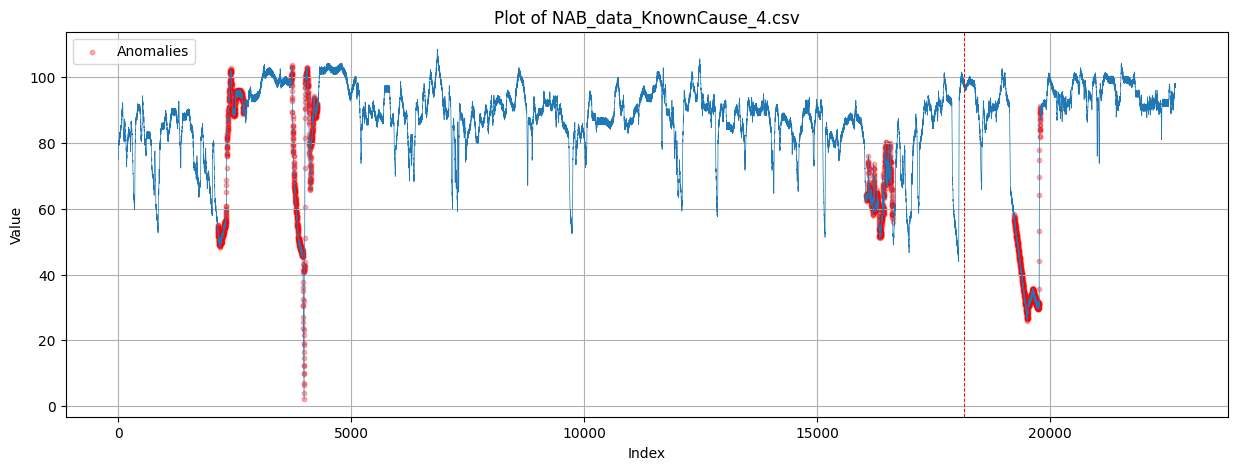

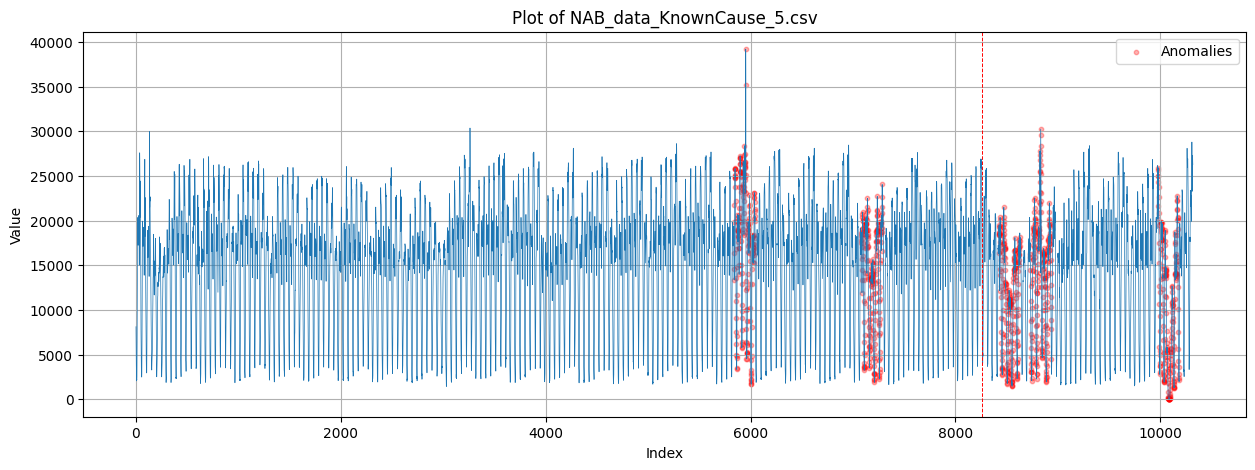

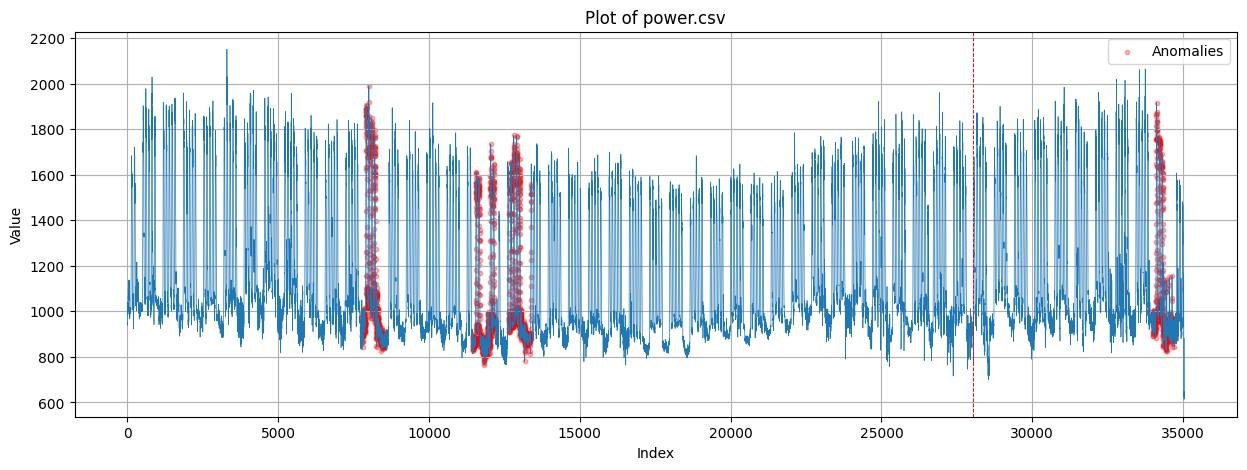

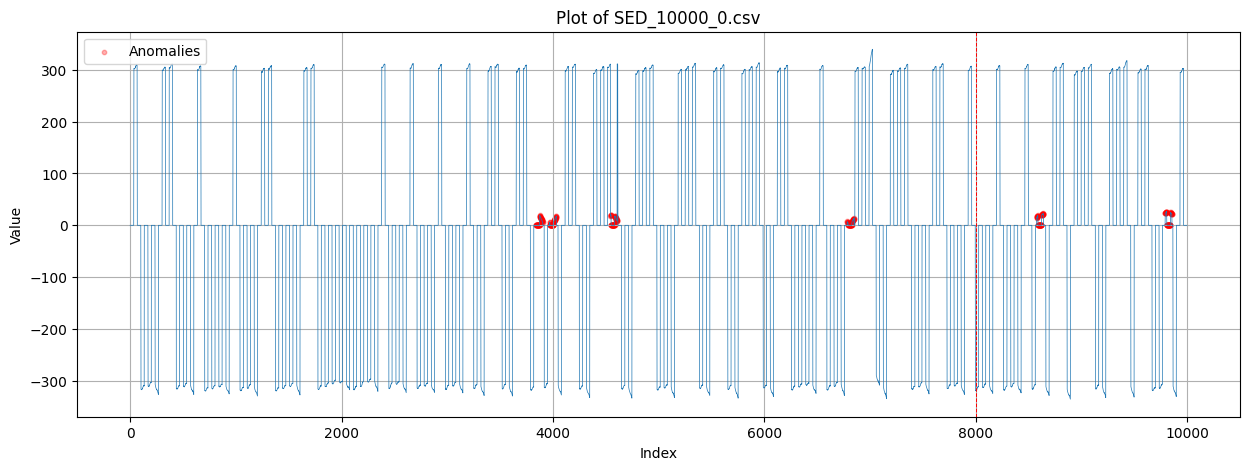

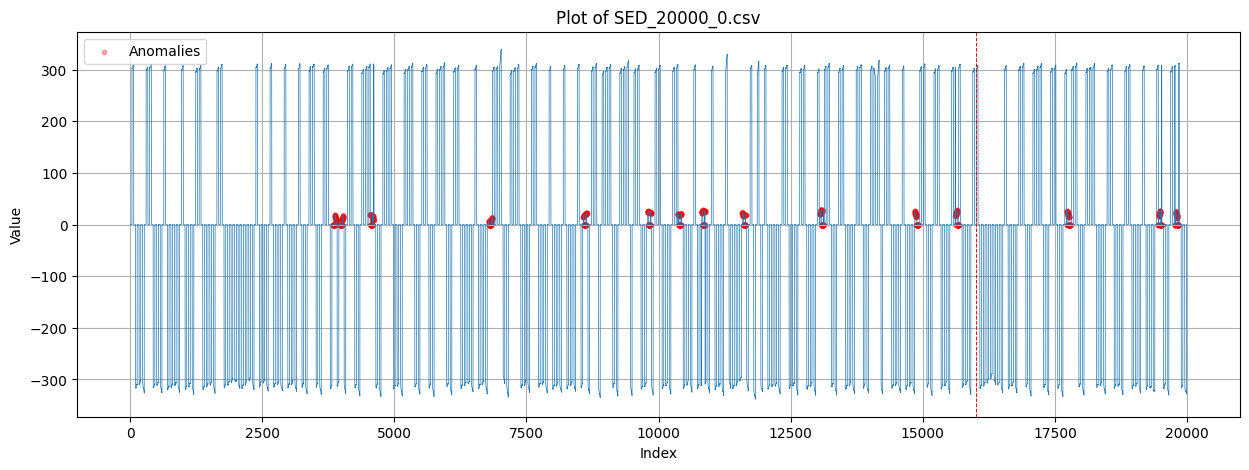

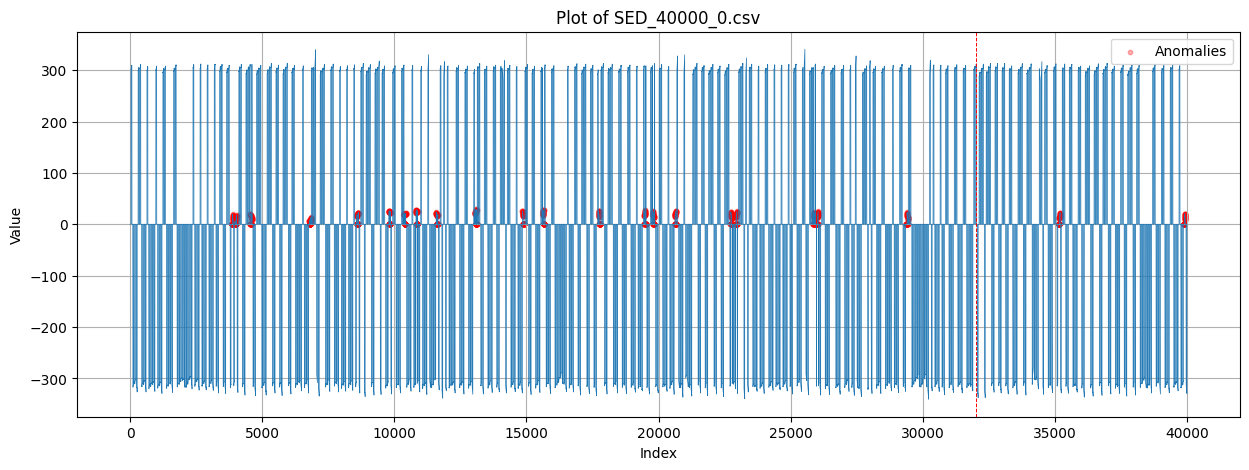

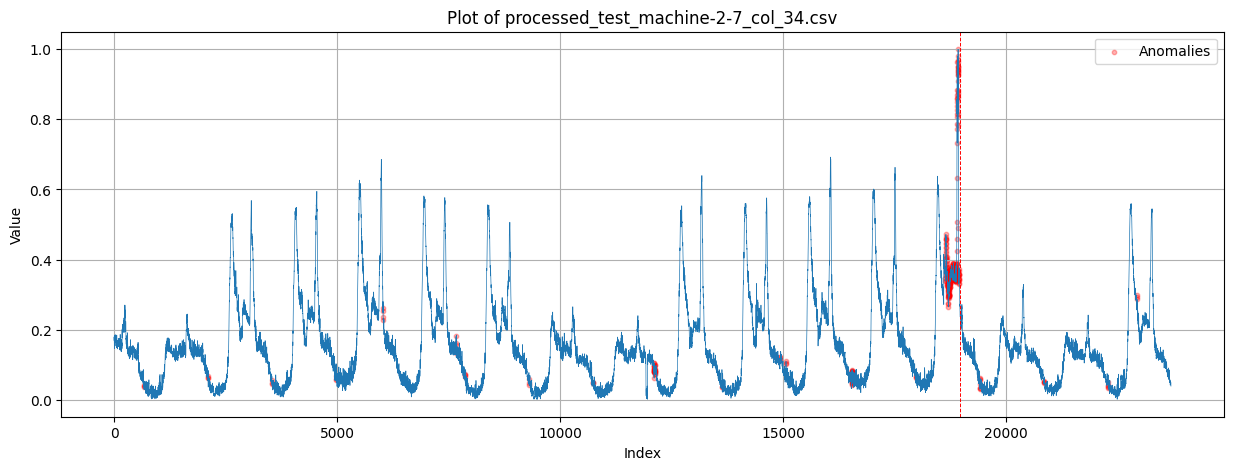

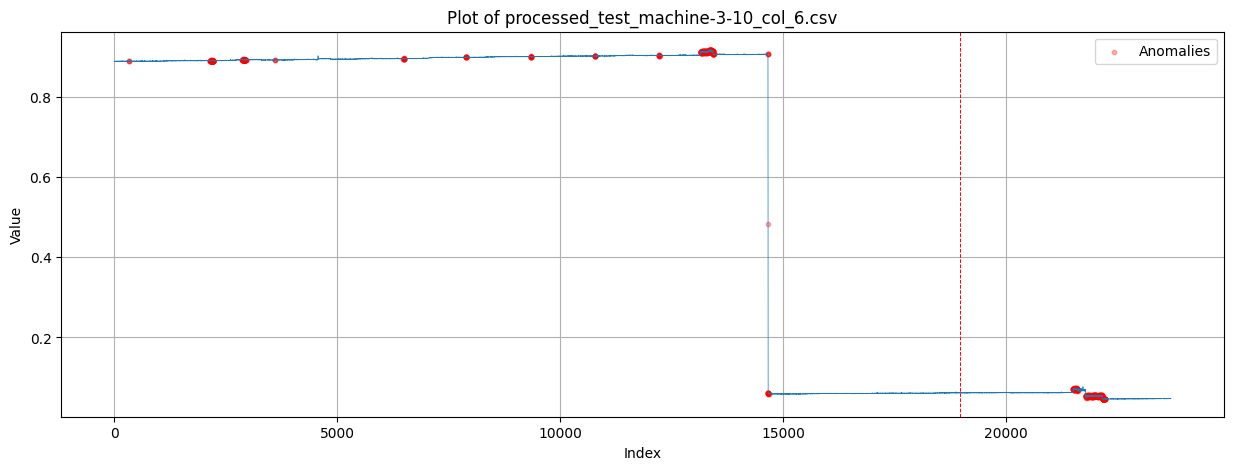

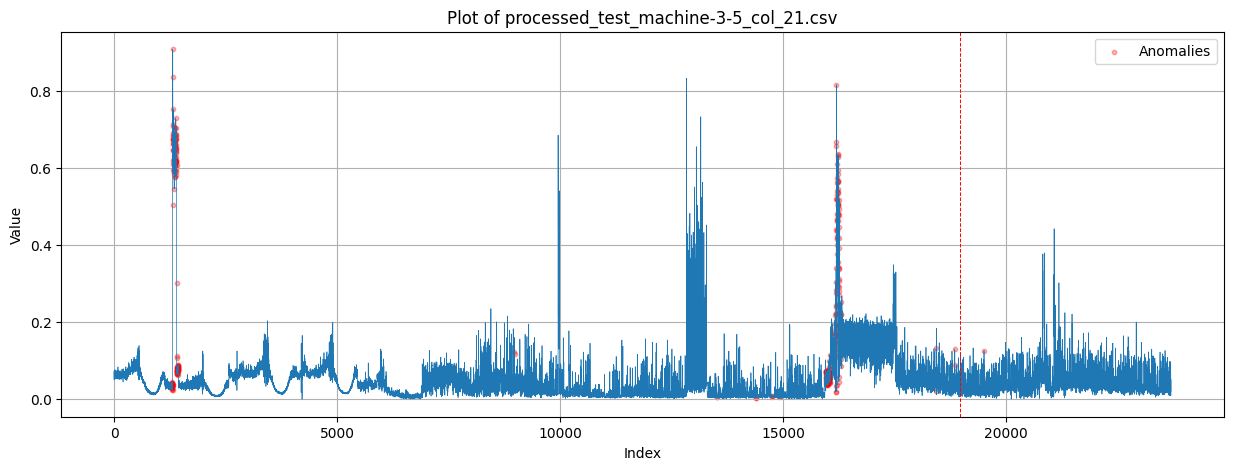

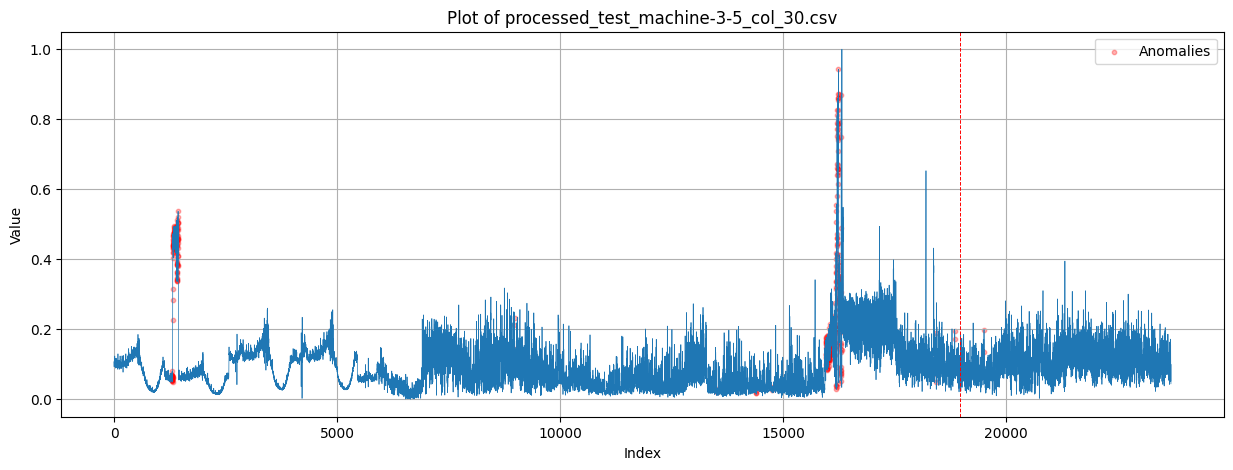

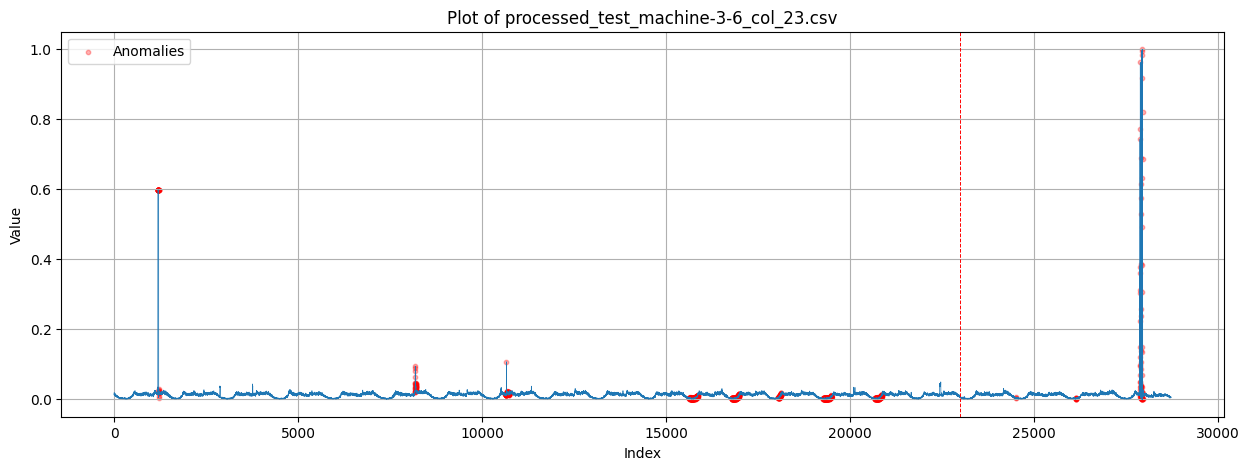

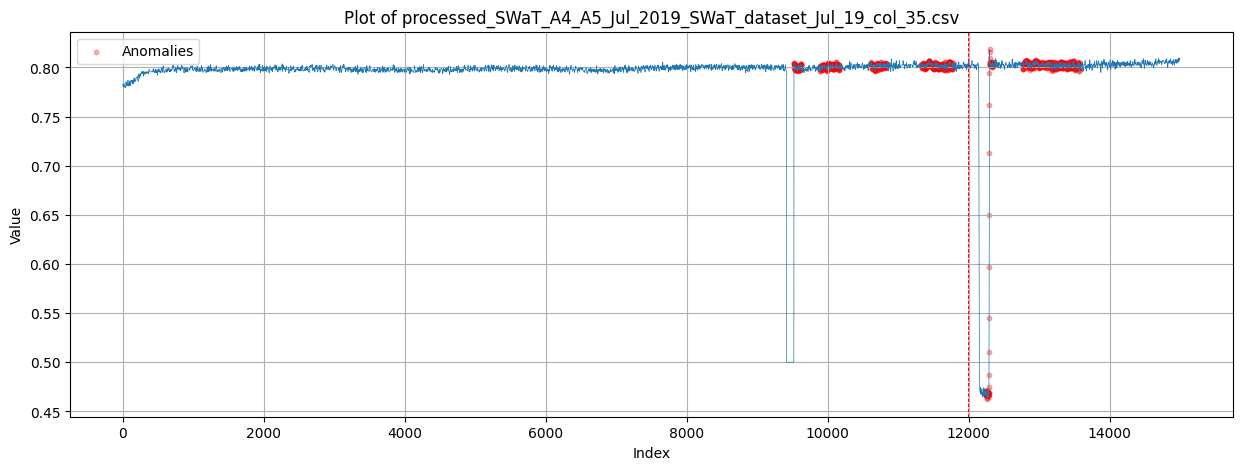

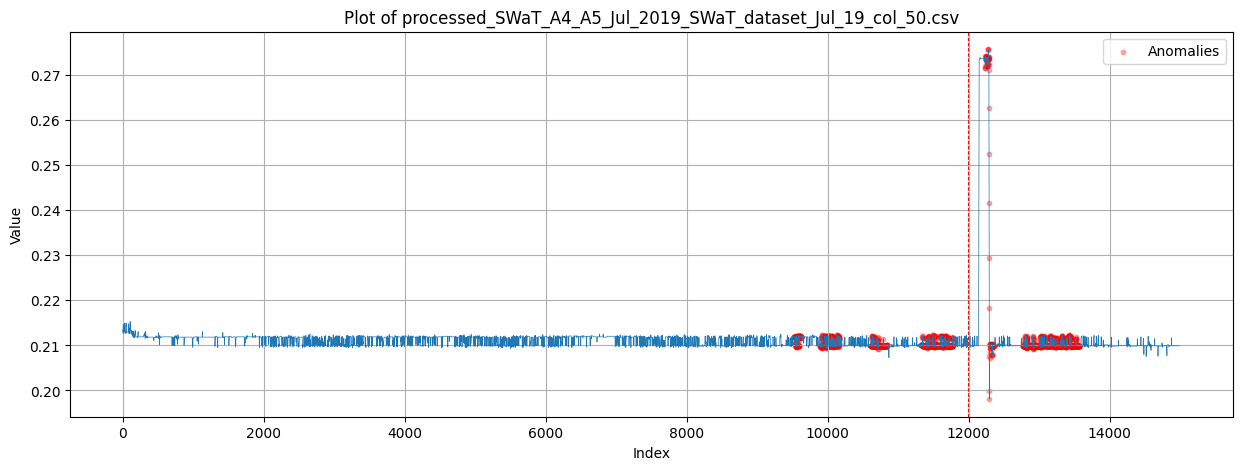

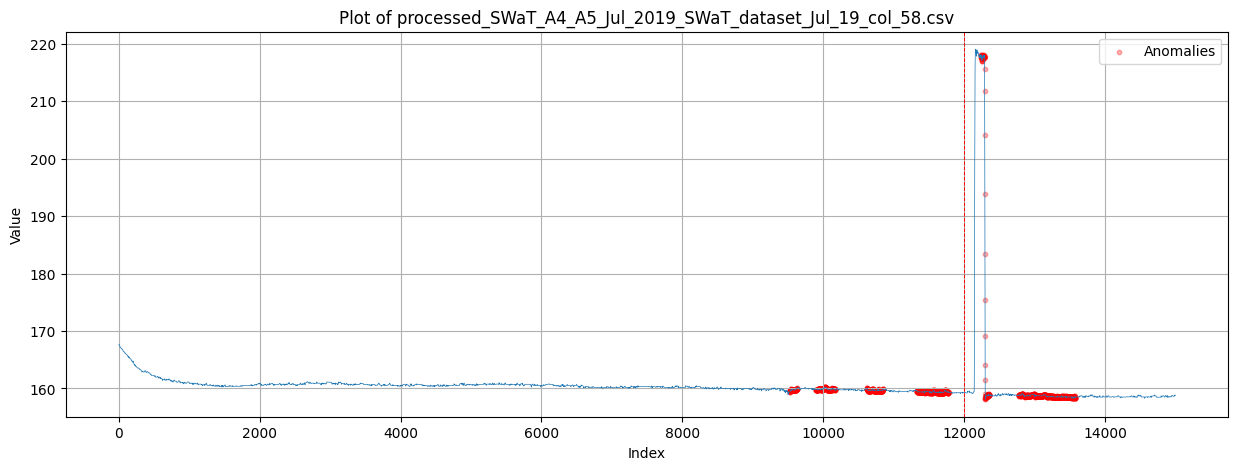

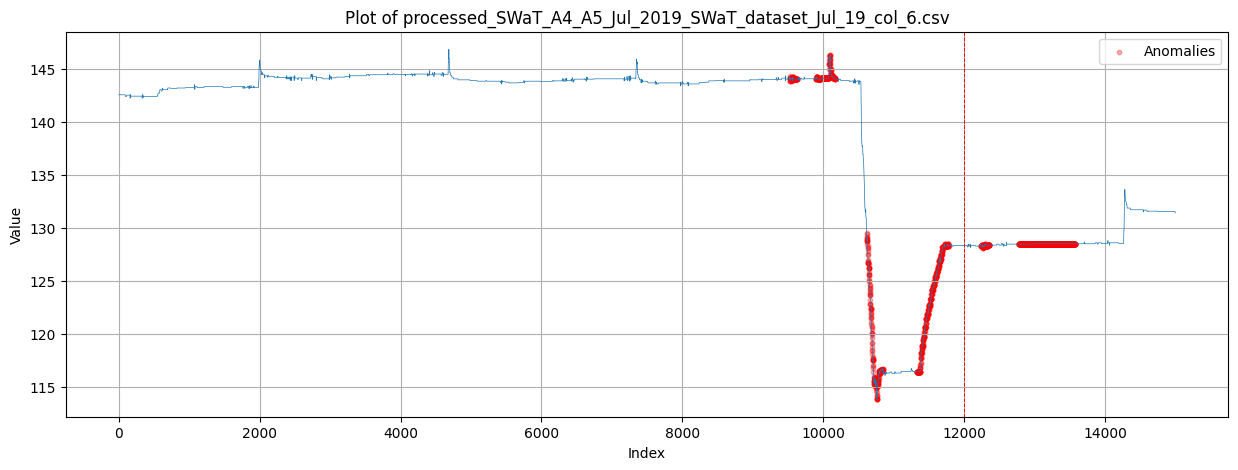

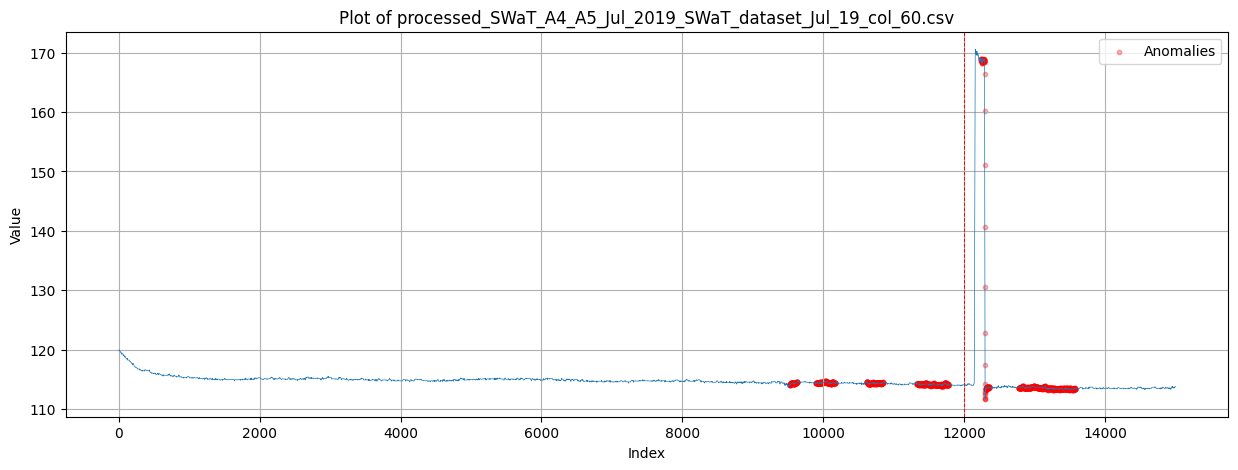

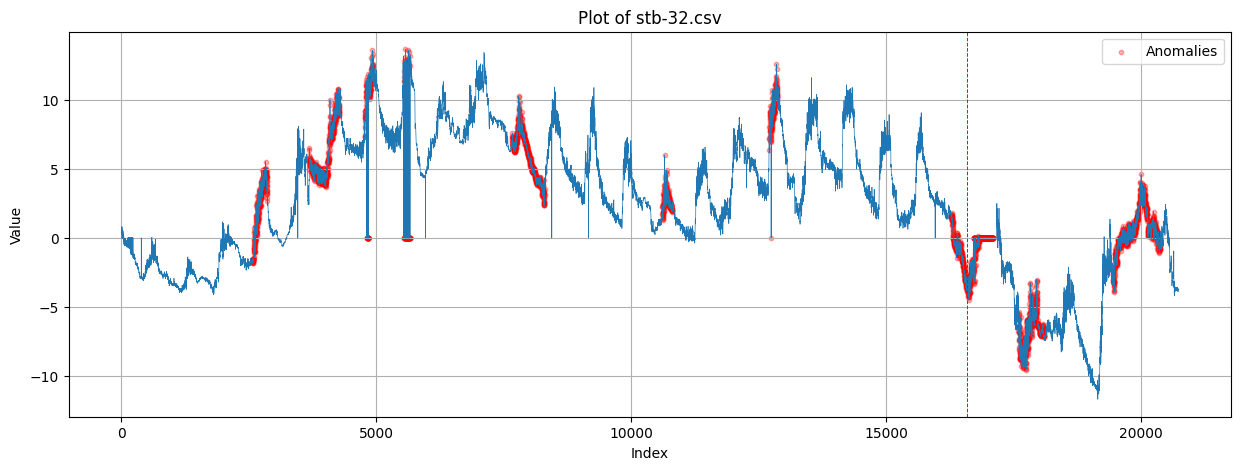

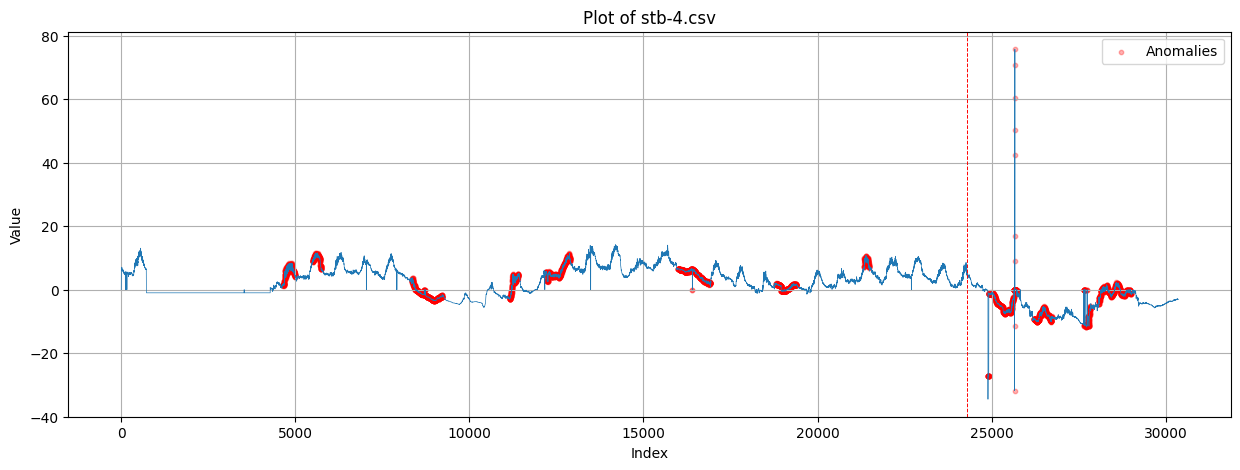

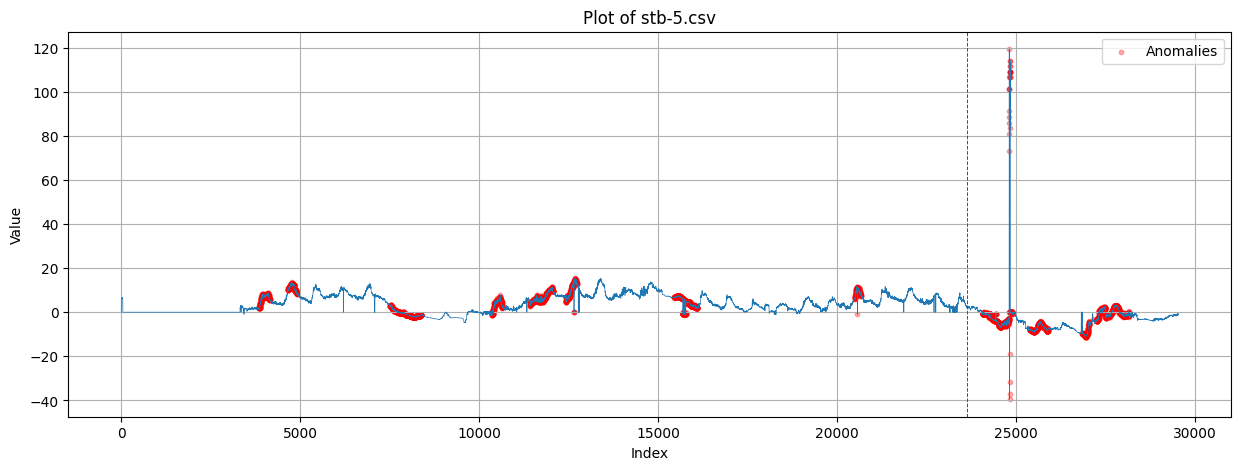

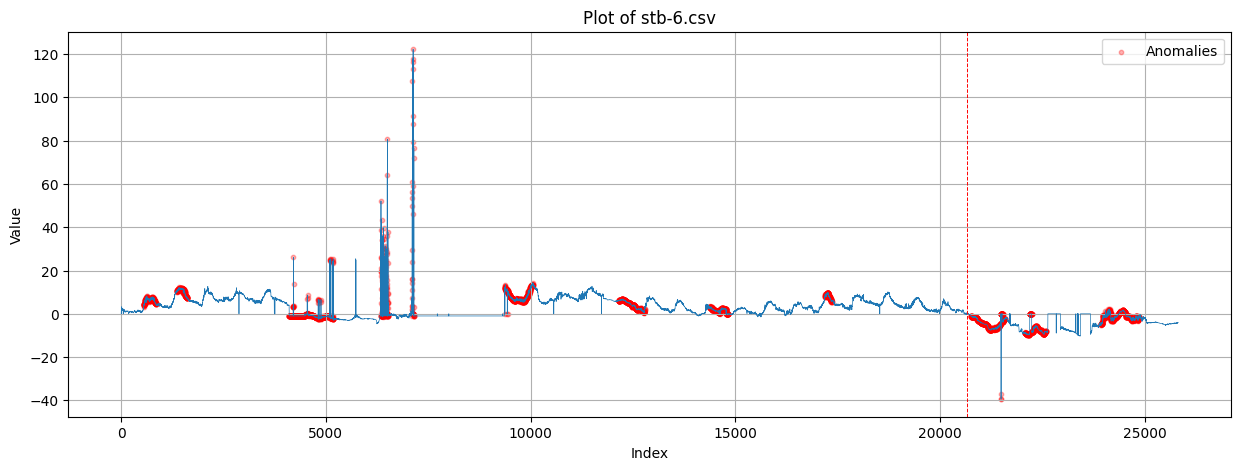

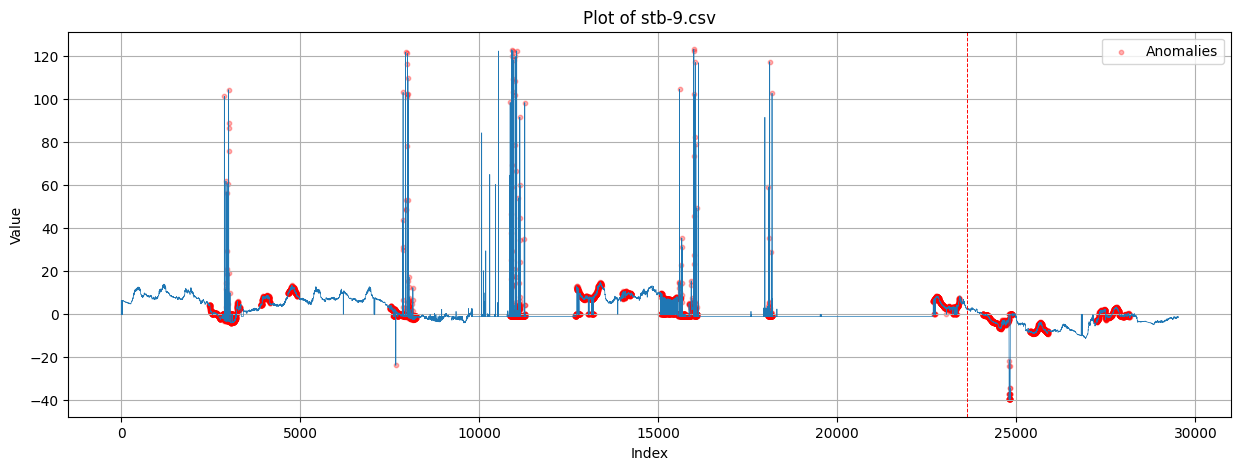

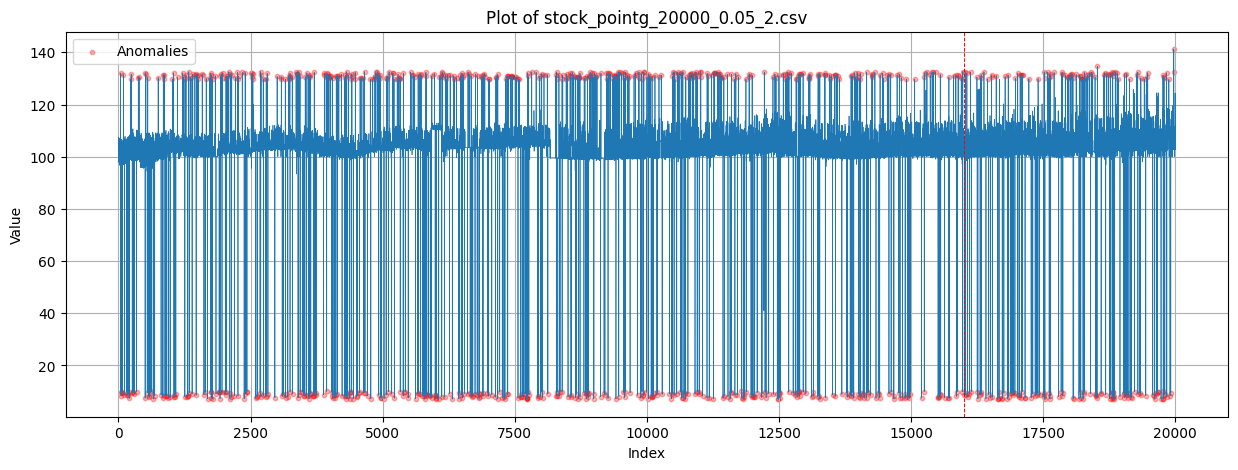

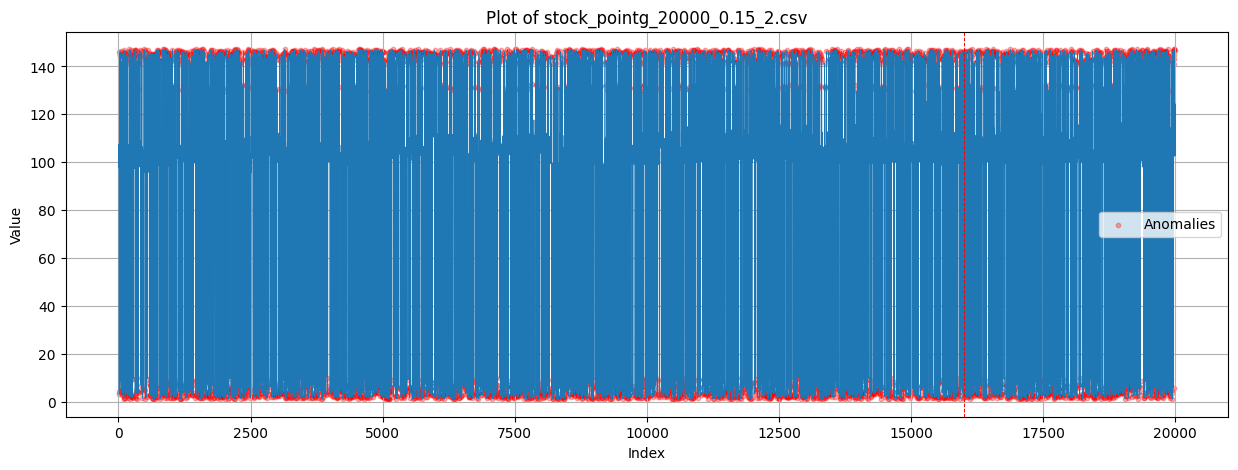

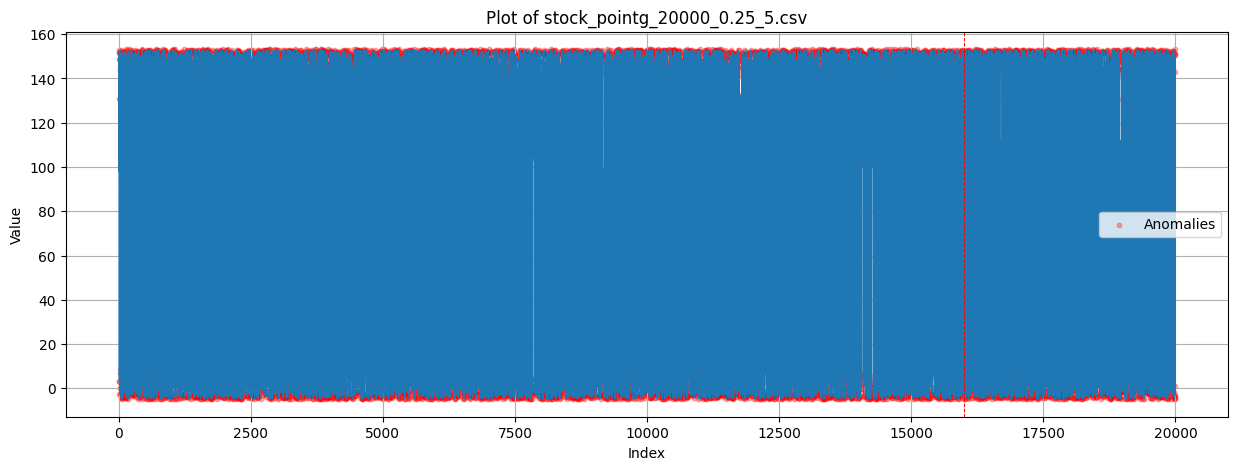

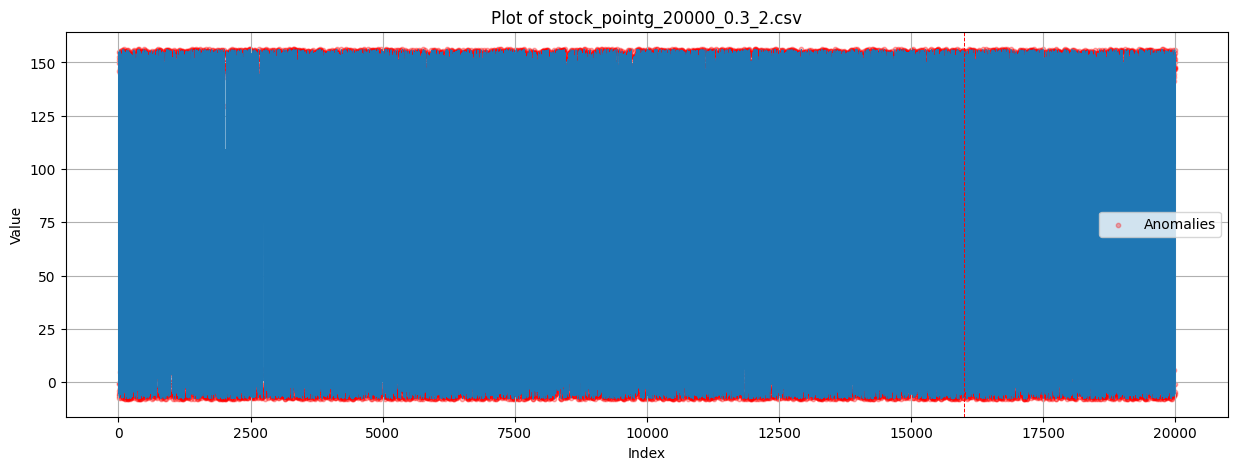

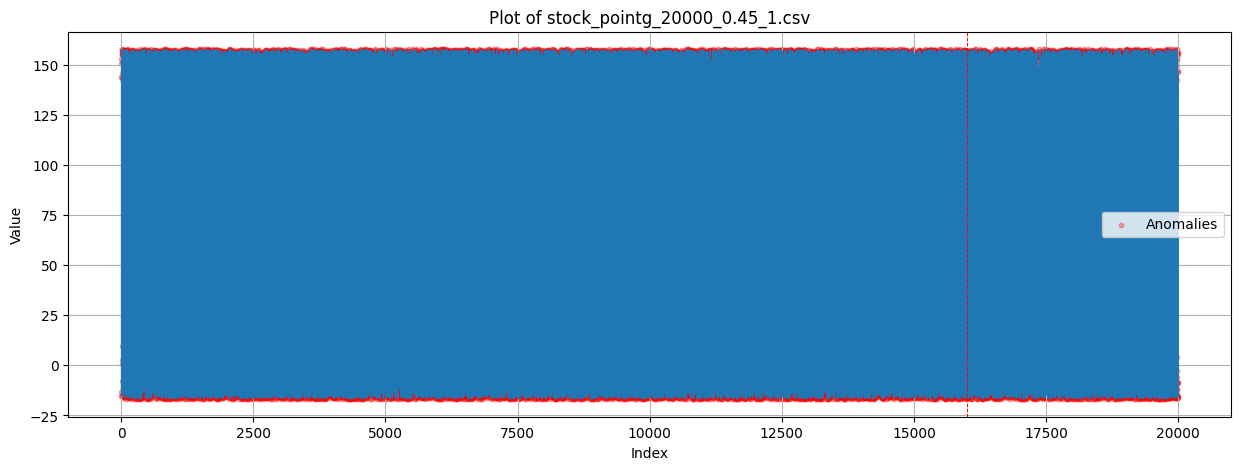

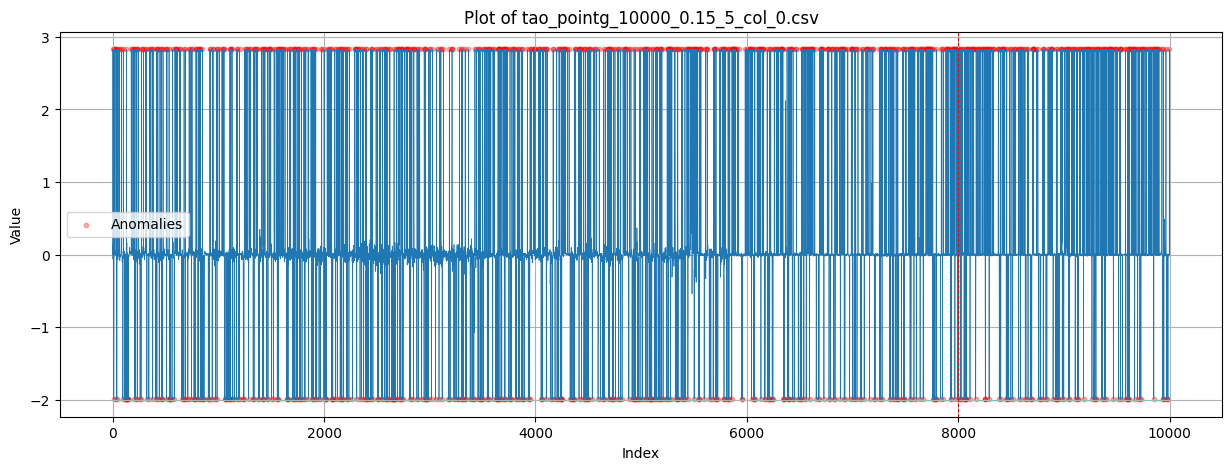

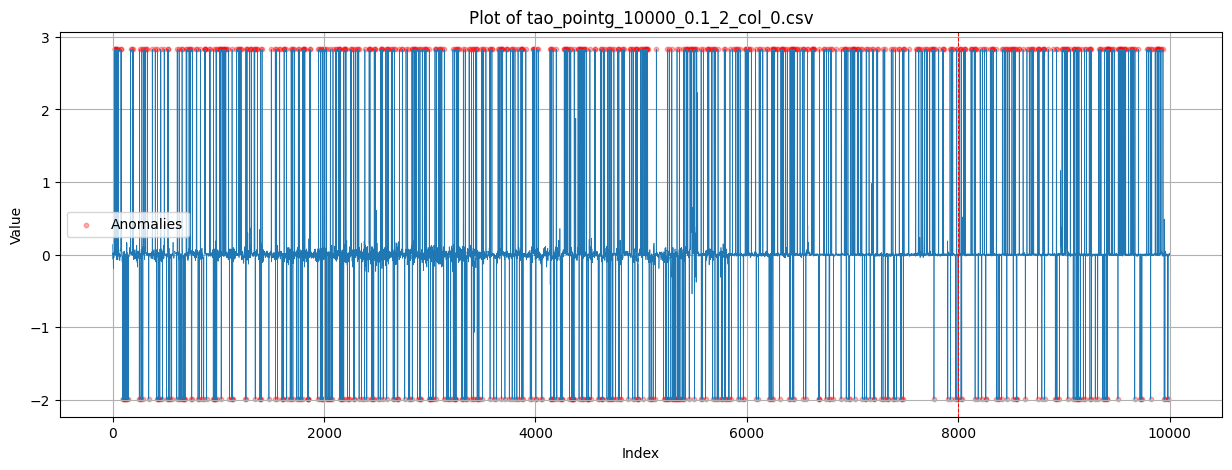

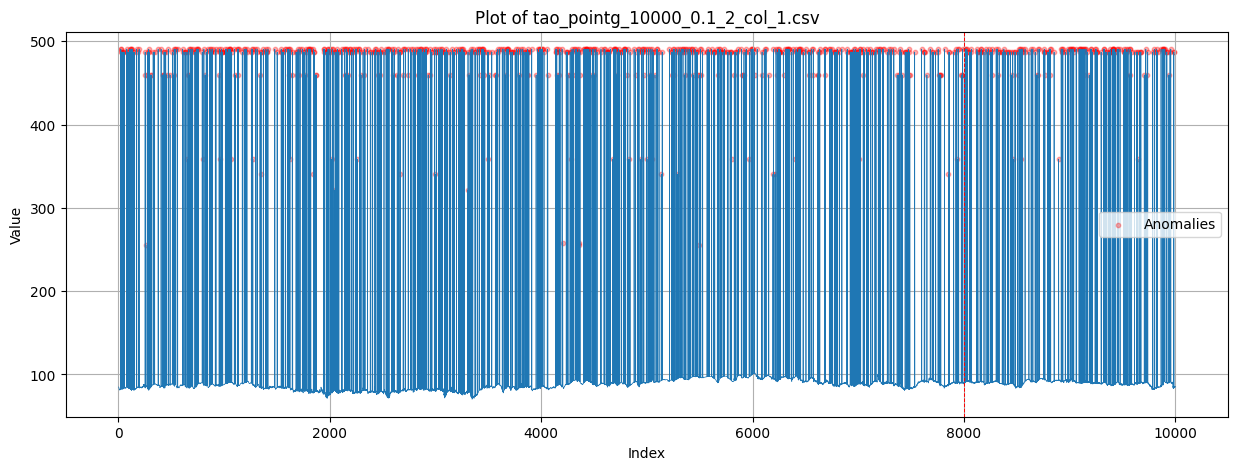

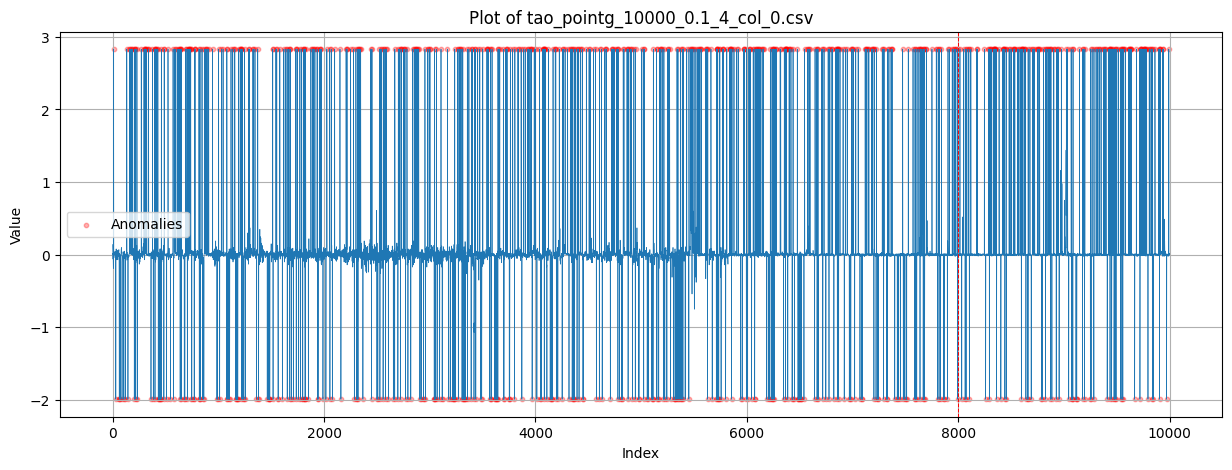

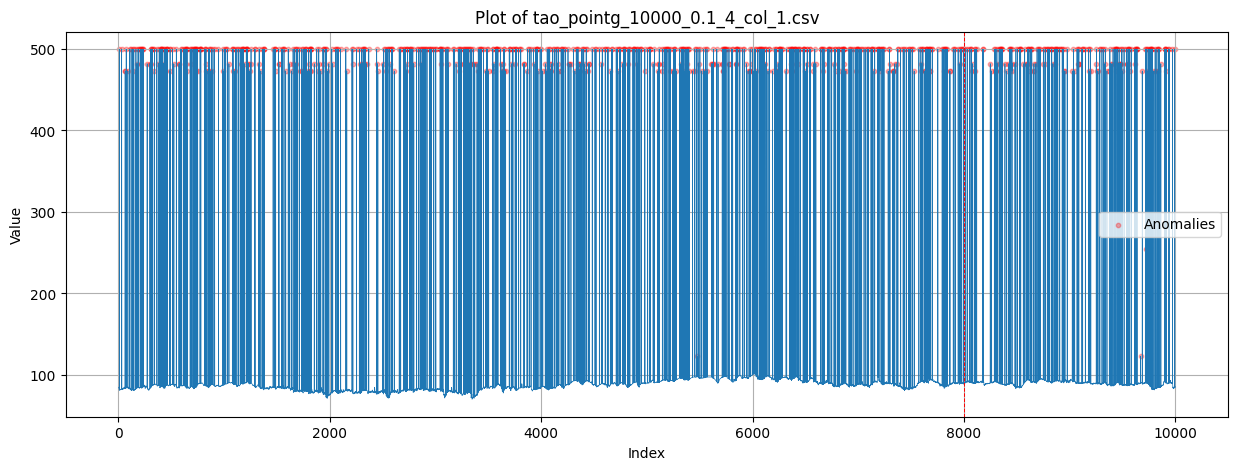

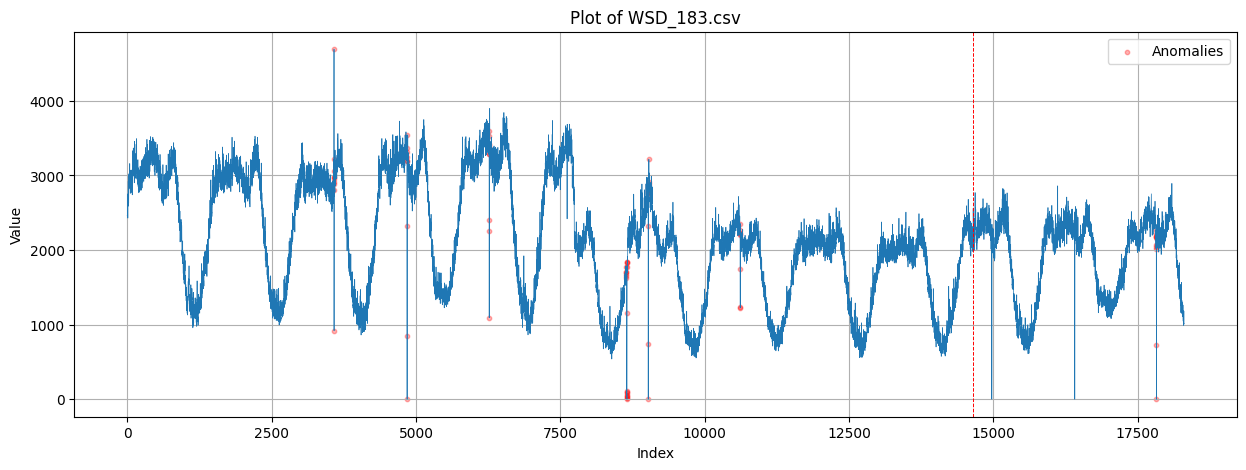

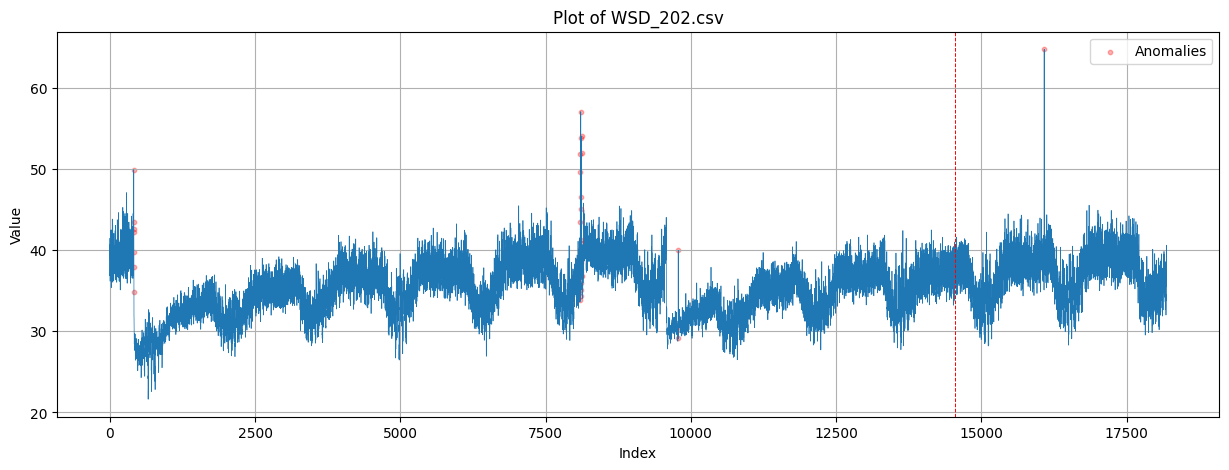

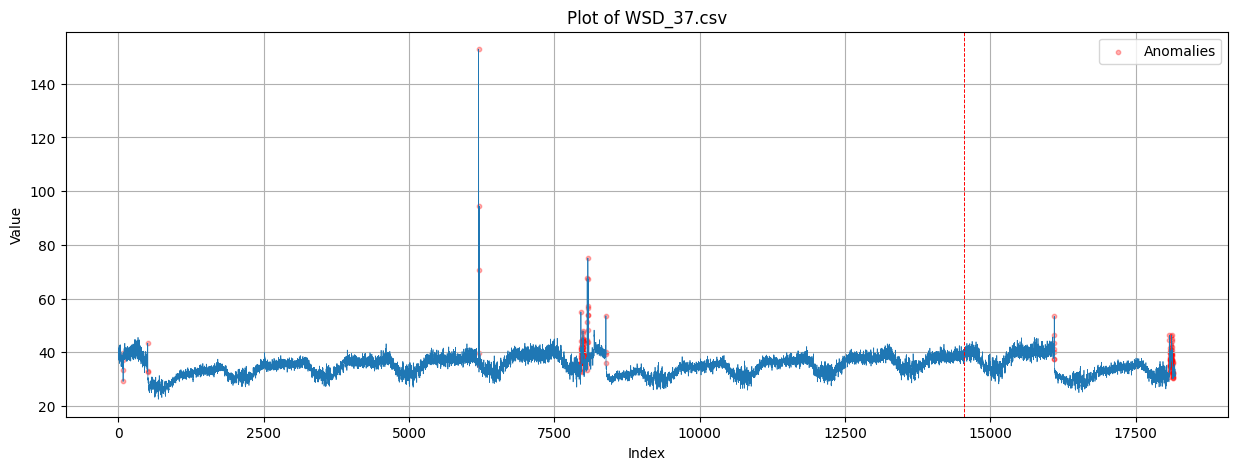

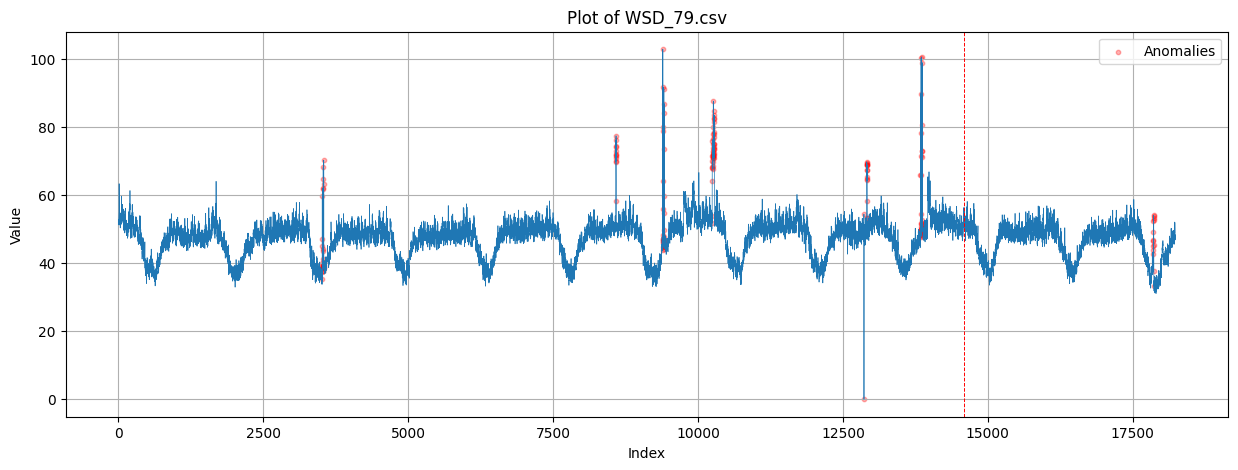

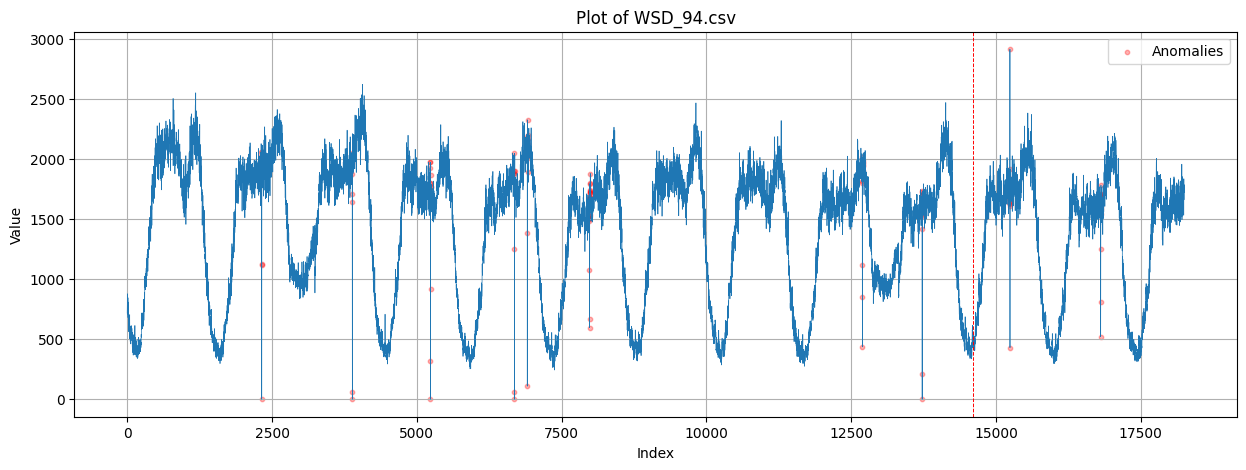

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_datasets(dataset_file):
    try:
        with open(dataset_file, 'r') as f:
            filepaths = [line.strip() for line in f if line.strip()]
    except FileNotFoundError:
        print(f"Error: {dataset_file} not found.")
        return

    for filepath in filepaths:
        try:
            df = pd.read_csv(filepath)
            
            if df.empty:
                print(f"Skipping empty file: {filepath}")
                continue

            # Determine which column to plot
            if 'Data' in df.columns:
                data_column = 'Data'
            elif 'value' in df.columns:
                data_column = 'value'
            elif len(df.columns) == 1:
                data_column = df.columns[0]
            elif len(df.columns) > 1 and pd.api.types.is_numeric_dtype(df.iloc[:, 1]):
                data_column = df.columns[1]
            else:
                data_column = df.columns[0]
            
            plt.figure(figsize=(15, 5))
            plt.plot(df[data_column], linewidth=0.5)
            plt.axvline(x=int(len(df) * 0.8), color='r', linestyle='--', linewidth=0.7)
            
            # Plot anomalies if 'Label' column exists
            if 'Label' in df.columns:
                anomalies = df[df['Label'] == 1]
                if not anomalies.empty:
                    plt.scatter(anomalies.index, anomalies[data_column], color='red', s=10, alpha=0.3, label='Anomalies')
                    plt.legend()
            
            plt.title(f"Plot of {os.path.basename(filepath)}")
            plt.xlabel("Index")
            plt.ylabel("Value")
            plt.grid(True)
            plt.show()
            
        except Exception as e:
            print(f"Could not plot {filepath}. Error: {e}")

# Name of the file containing the list of datasets
dataset_list_file = 'dataset.txt'
plot_datasets(dataset_list_file)